Part a) Ordinary Least Square (OLS) for the Runge function

In [ ]:
#Starting by generating point of x in the interval [-1,1]

import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#choosing datapoints between 1 and -1 
n = 100
x = np.linspace (-1,1, n)


#From the Runge function: for every x, compute the correspponding y
y = 1/(1 + 25 * x**2)
#Adding noise (Gaussian) with mean 0 and variance 1: N(0,1)
noise = np.random.normal(0,1,n)
y_noisy = y + 0.1 * noise


#Creating feature matrix with shape [1,x,x^2,x^3,x^4 ...]
def polynomial_features(x, p, intercept = True):
    n = len(x)
    if intercept == True: # adding functionality for intercept
        X = np.zeros((n, p + 1))
        X[:, 0] = 1  # intercept column first
        for i in range(1, p + 1): # from 1 to p inclusive
            X[:, i] = x ** i
    else: #if intercept is False
            X = np.zeros((n, p)) #no intercept column
            for i in range(p): #from 0 to p-1
                X[:, i] = x ** (i + 1) 

    return X

def OLS_parameters(X, y):
    X_T_X = np.linalg.pinv(X.T @ X)
    beta_OLS = X_T_X @ X.T @ y
    return beta_OLS

def R2_score(actual , predicted):
     numerator = np.sum((actual - predicted) ** 2) #the numerator of the r2 formula
     actual_mean = np.mean(actual) #our mean value of the actual values
     denominator = np.sum((actual - actual_mean) ** 2) #denominator of the r2 formula
     R2 = 1 - (numerator / denominator) #calculating the r2
     return R2




In [ ]:
#we start by creating the design matrix and splitting it into training and test data
X = polynomial_features(x, 15)
X_train , X_test , y_train , y_test = train_test_split(X , y_noisy , test_size = 0.2)


#thereby calculating the OLS coefficients
beta = OLS_parameters(X_train, y_train)
y_pred = X_test @ beta #here we predict the y values using the coefficient calculated

mse_y_pred = mean_squared_error(y_test , y_pred) # calculating the MSE
R2 = R2_score(y_test , y_pred) #calculating the R2 score



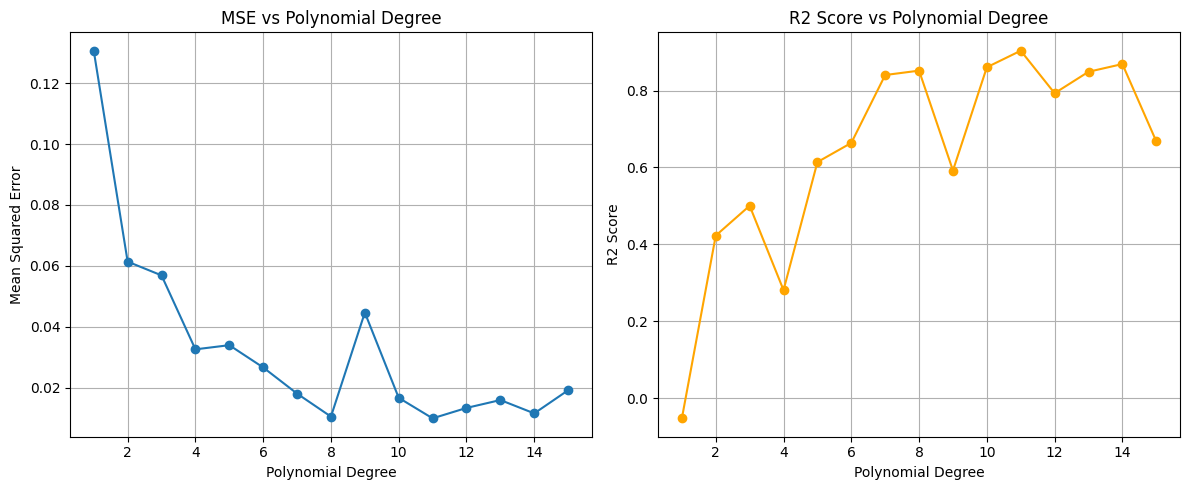

In [ ]:
import matplotlib.pyplot as plt

mse_values_OLS = np.zeros(15) #storing the mse values for each polynomial degree
R2_values_OLS = np.zeros(15) #storing the r2 values for each polynomial

for i in range(1 , 16):
    X = polynomial_features(x , i)
    X_train , X_test , y_train , y_test = train_test_split(X , y_noisy , test_size = 0.2)
    beta = OLS_parameters(X_train , y_train)
    y_pred = X_test @ beta
    mse_values_OLS[i-1] = mean_squared_error(y_test , y_pred)
    R2_values_OLS[i-1] = R2_score(y_test , y_pred)


#now we create degrees array as well
degrees = np.arange(1 , 16)
plt.figure(figsize = (12 , 5))
plt.subplot(1 , 2 , 1)
plt.plot(degrees , mse_values_OLS , marker = 'o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid()
plt.subplot(1 , 2 , 2)
plt.plot(degrees , R2_values_OLS , marker = 'o' , color = 'orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Polynomial Degree')
plt.grid()
plt.tight_layout()
plt.show()

### b)

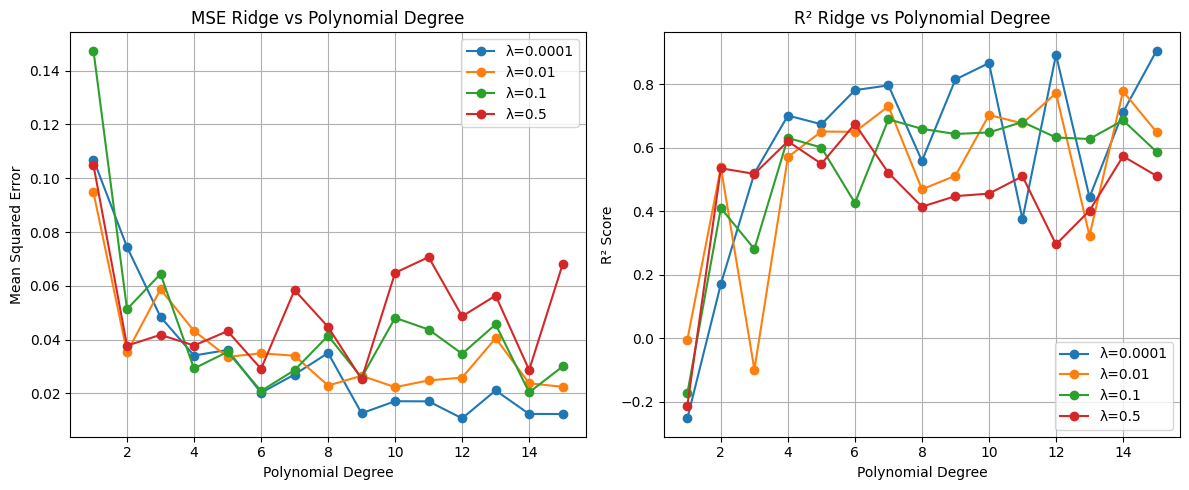

In [ ]:
def ridge_regression(X , y , lamb):
    I = np.identity(X.shape[1]) # need to have the identity matrix
    return (np.linalg.inv(X.T @ X + lamb * I) @ X.T @ y) #the actual expression for optimal beta

#setting differing values for lambda
lambd = [0.0001 , 0.01 , 0.1 , 0.5]

mse_values_ridge = np.zeros((15 , len(lambd)))
R2_values_ridge = np.zeros((15, len(lambd)))

for l in range(len(lambd)):
    for i in range(1 , 16):
        X = polynomial_features(x , i)
        X_train , X_test , y_train , y_test = train_test_split(X , y_noisy , test_size = 0.2)
        beta_ridge = ridge_regression(X_train , y_train , lambd[l])
        y_pred_ridge = X_test @ beta_ridge

        mse_values_ridge[i-1, l ] = mean_squared_error(y_test , y_pred_ridge)
        R2_values_ridge[i-1 , l] = R2_score(y_test , y_pred_ridge)




plt.figure(figsize=(12, 5))

# ---- MSE plot ----
plt.subplot(1, 2, 1)
for l in range(len(lambd)):
    plt.plot(degrees, mse_values_ridge[:, l], marker='o', label=f"λ={lambd[l]}")
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE Ridge vs Polynomial Degree')
plt.legend()
plt.grid()

# ---- R² plot ----
plt.subplot(1, 2, 2)
for l in range(len(lambd)):
    plt.plot(degrees, R2_values_ridge[:, l], marker='o', label=f"λ={lambd[l]}")
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Ridge vs Polynomial Degree')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

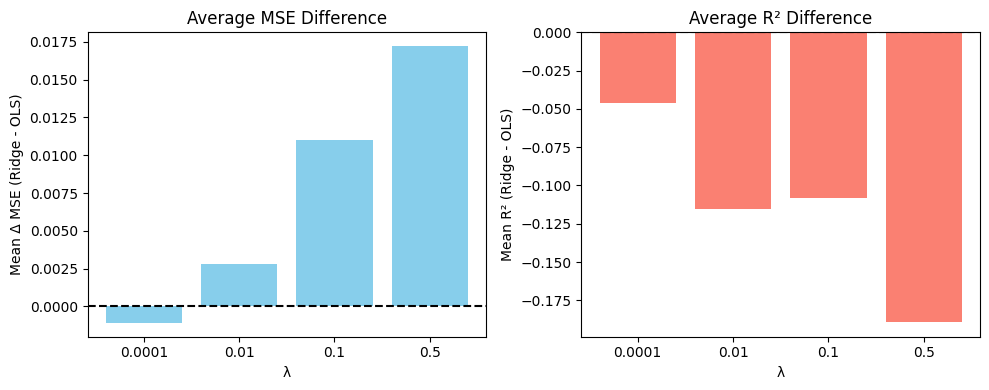

In [ ]:
difference_mse = np.zeros((15 , 4))
difference_r2 = np.zeros((15 , 4))
for j in range(len(lambd)):
    for i in range(1 , 16):
        difference_mse[i-1, j] = mse_values_ridge[i-1, j] - mse_values_OLS[i-1]
        difference_r2[i-1 , j] = R2_values_ridge[i-1 , j] - R2_values_OLS[i-1]


mean_diff_mse = np.mean(difference_mse, axis=0)   # one value per λ
mean_diff_r2  = np.mean(difference_r2, axis=0)    # one value per λ

plt.figure(figsize=(10,4))

# ---- Mean difference in MSE ----
plt.subplot(1,2,1)
plt.bar([str(l) for l in lambd], mean_diff_mse, color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("λ")
plt.ylabel("Mean Δ MSE (Ridge - OLS)")
plt.title("Average MSE Difference")

# ---- Mean difference in R² ----
plt.subplot(1,2,2)
plt.bar([str(l) for l in lambd], mean_diff_r2, color='salmon')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("λ")
plt.ylabel("Mean R² (Ridge - OLS)")
plt.title("Average R² Difference")

plt.tight_layout()
plt.show()
